In [142]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [143]:
df = pd.read_excel('pizza.xlsx')

In [144]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [146]:
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['day'] = df['order_date'].dt.day_name()
df['combined_datetime'] = pd.to_datetime(df['order_date'].astype(str) + ' ' + df['order_time'].astype(str))

In [147]:
df.tail()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,year,month,day,combined_datetime
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,2015,12,Thursday,2015-12-31 21:23:10
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,2015,12,Thursday,2015-12-31 21:23:10
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,2015,12,Thursday,2015-12-31 21:23:10
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015,12,Thursday,2015-12-31 22:09:54
48619,48620,21350,bbq_ckn_s,1,2015-12-31,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza,2015,12,Thursday,2015-12-31 23:02:05


In [148]:
print(df['month'].unique())
print(df['year'].unique())
print(df['day'].unique())



[ 1  2  3  4  5  6  7  8  9 10 11 12]
[2015]
['Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


Notre jeu de données présente des données de commandes allant du lundi au dimanche.  
Or la consigne indique :   
*" Du mardi au vendredi, les clients peuvent se régaler, en se rendant à la sortie métro Joliette entre
11h et 21h. "*  

Je décide de retirer de mon dataframe les données de samedi, dimanche, lundi.

ferie = ['Saturday','Sunday','Monday']
df.loc[~df['day'].isin(ferie)]['day'].unique()


df = df.loc[~df['day'].isin(ferie),:]

## Informations de base :
### a. Combien de pizzas uniques (pizza_id distincts) y a-t-il dans le jeu de données ?

In [149]:
df['pizza_id'].nunique()

91

### b. Combien de commandes uniques (order_id distincts) figurent dans le jeu de données ?

In [150]:
df['order_id'].nunique()

21350

## 3. Analyse temporelle :
### a. Quelle est la plage de dates dans le jeu de données ?

In [151]:
df['order_date'].min()

Timestamp('2015-01-01 00:00:00')

In [152]:
df['order_date'].max()

Timestamp('2015-12-31 00:00:00')

In [153]:
df['order_time'].min()

datetime.time(9, 52, 21)

In [154]:
df['order_time'].max()

datetime.time(23, 5, 52)

On remarque que des commandes sont passées avant et après les horaires d'ouverture et fermeture mais cela peut s'expliquer par un pic d'activité.  
C'est la raison pour laquelle je décide de garder ces données.

### b. Combien de commandes ont été passées chaque jour ?

In [155]:
df.groupby('order_date')['order_id'].count()

order_date
2015-01-01    161
2015-01-02    160
2015-01-03    154
2015-01-04    106
2015-01-05    121
             ... 
2015-12-27     87
2015-12-28    102
2015-12-29     77
2015-12-30     73
2015-12-31    171
Name: order_id, Length: 358, dtype: int64

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
 12  year               48620 non-null  int32         
 13  month              48620 non-null  int32         
 14  day   

c. Quelle est la durée moyenne pour traiter une commande ?

In [157]:
# Conversion de la colonne order_time au format datetime
df['order_time'] = pd.to_datetime(df['order_time'], format="%H:%M:%S")

# Fonction pour calculer l'intervalle de temps entre chaque commande
def calculate_time_difference(row):
    if calculate_time_difference.prev_time is None:
        calculate_time_difference.prev_time = row
        return pd.Timedelta(0)  # Pour la première ligne, la différence est 0
    else:
        time_difference = row - calculate_time_difference.prev_time
        calculate_time_difference.prev_time = row
        return time_difference

# Initialisez la variable statique pour stocker le timestamp précédent
calculate_time_difference.prev_time = None

# Appliquez la fonction à toute la colonne
df['time_difference'] = df['order_time'].apply(calculate_time_difference)



In [158]:
# Je regroupe mes commandes afin d'avoir la moyenne du temps de préparation.
print('La durée moyenne de traitement d\'une commande est de: ',df.groupby('order_id')['time_difference'].max().mean())

La durée moyenne de traitement d'une commande est de:  0 days 00:05:25.668009367


## 4. Analyse de la quantité :
### a. Quelle est la quantité moyenne de pizzas commandées ?

In [199]:
print('La quantité moyenne de pizzas commandées est:', df.groupby(['order_id'])['quantity'].sum().mean())

La quantité moyenne de pizzas commandées est: 2.321967213114754


### b. Quelle est la taille de pizza la plus fréquemment commandée ?

In [160]:
print("Tailles de pizza proposées :",df['pizza_size'].unique())

Tailles de pizza proposées : ['M' 'L' 'S' 'XL' 'XXL']


In [202]:
df

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,year,month,day,combined_datetime,time_difference,hours
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015,1,Thursday,2015-01-01 11:38:36,0 days 00:00:00,11
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015,1,Thursday,2015-01-01 11:57:40,0 days 00:19:04,11
2,3,2,five_cheese_l,1,2015-01-01,1900-01-01 11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015,1,Thursday,2015-01-01 11:57:40,0 days 00:00:00,11
3,4,2,ital_supr_l,1,2015-01-01,1900-01-01 11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015,1,Thursday,2015-01-01 11:57:40,0 days 00:00:00,11
4,5,2,mexicana_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015,1,Thursday,2015-01-01 11:57:40,0 days 00:00:00,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,1900-01-01 21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,2015,12,Thursday,2015-12-31 21:23:10,0 days 00:08:33,21
48616,48617,21348,four_cheese_l,1,2015-12-31,1900-01-01 21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,2015,12,Thursday,2015-12-31 21:23:10,0 days 00:00:00,21
48617,48618,21348,napolitana_s,1,2015-12-31,1900-01-01 21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,2015,12,Thursday,2015-12-31 21:23:10,0 days 00:00:00,21
48618,48619,21349,mexicana_l,1,2015-12-31,1900-01-01 22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015,12,Thursday,2015-12-31 22:09:54,0 days 00:46:44,22


In [161]:
df['pizza_size'].value_counts()

pizza_size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64

La taille de pizza la plus fréquemment commandée est la taille **"L"**.

### c. Quelle est la catégorie de pizza la plus fréquemment commandée ?

In [162]:
print("Liste des catégories de pizza:",df['pizza_category'].unique())

Liste des catégories de pizza: ['Classic' 'Veggie' 'Supreme' 'Chicken']


In [163]:
df['pizza_category'].value_counts()

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: count, dtype: int64

La catégorie de pizza la plus commandée est la **Classic**.

## 5. Analyse des prix :
### a. Quel est le prix unitaire moyen des pizzas ?

In [164]:
print("Prix moyen d'une pizza classé par catégorie et par taille")
df.groupby(['pizza_category','pizza_size'])['unit_price'].mean()

Prix moyen d'une pizza classé par catégorie et par taille


pizza_category  pizza_size
Chicken         L             20.750000
                M             16.750000
                S             12.750000
Classic         L             18.376850
                M             14.739122
                S             11.375021
                XL            25.500000
                XXL           35.950000
Supreme         L             20.652837
                M             16.429972
                S             14.048149
Veggie          L             19.295383
                M             15.938485
                S             12.161352
Name: unit_price, dtype: float64

In [165]:
print("Prix moyen d'une pizza (categories et tailles confondues)",df['unit_price'].mean())

Prix moyen d'une pizza (categories et tailles confondues) 16.494132044426163


### b. Quel est le prix total moyen d'une commande ?

In [166]:
df.groupby('order_id')['total_price'].mean().mean()

16.727513032556825

### c. Quelle pizza a le prix unitaire le plus élevé ?

In [167]:
df.loc[df['unit_price']==df['unit_price'].max()][['pizza_name','unit_price']].head(1)

,pizza_name,unit_price
3447,The Greek Pizza,35.95


## 6. Répartition par taille et catégorie :
### a. Combien de pizzas de chaque taille ont été vendues ?

In [168]:
df.groupby(['pizza_size'])['quantity'].sum()

pizza_size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: quantity, dtype: int64

### b. Combien de pizzas y a-t-il dans chaque catégorie ?

In [169]:
df.groupby('pizza_category')['pizza_name'].nunique()

pizza_category
Chicken    6
Classic    8
Supreme    9
Veggie     9
Name: pizza_name, dtype: int64

## 7. Analyse des ingrédients :
### a. Quels sont les ingrédients les plus couramment utilisés dans toutes les pizzas ?

In [170]:
# Utiliser explode pour séparer les listes d'ingrédients
df_exploded = df['pizza_ingredients'].str.split(', ').explode()

# Utiliser value_counts pour compter les occurrences de chaque ingrédient
ingredient_counts = df_exploded.value_counts()

# Afficher les résultats
print("Top 5 des ingrédients les plus utilisés : ",ingredient_counts[:10])

Top 5 des ingrédients les plus utilisés :  pizza_ingredients
Garlic               27422
Tomatoes             26601
Red Onions           19547
Red Peppers          16284
Mozzarella Cheese    10333
Pepperoni            10300
Spinach              10012
Mushrooms             9624
Chicken               8443
Capocollo             6572
Name: count, dtype: int64


### b. Combien de pizzas contiennent un ingrédient spécifique (par exemple,pepperoni, champignons) ?

In [171]:
ingredient = 'Garlic'
result = df.loc[df['pizza_ingredients'].str.contains(ingredient)]
unique_pizza_names = result['pizza_name'].unique()
print("Nombre de pizza(s):",result['pizza_name'].nunique())
print("Liste des noms de pizzas contenant",ingredient,":", unique_pizza_names)

Nombre de pizza(s): 20
Liste des noms de pizzas contenant Garlic : ['The Five Cheese Pizza' 'The Italian Supreme Pizza' 'The Mexicana Pizza'
 'The Greek Pizza' 'The Spinach Supreme Pizza'
 'The Italian Capocollo Pizza' 'The Spicy Italian Pizza'
 'The Spinach Pesto Pizza' 'The Vegetables + Vegetables Pizza'
 'The California Chicken Pizza' 'The Chicken Pesto Pizza'
 'The Soppressata Pizza' 'The Four Cheese Pizza' 'The Napolitana Pizza'
 'The Calabrese Pizza' 'The Italian Vegetables Pizza'
 'The Pepper Salami Pizza' 'The Spinach and Feta Pizza'
 'The Sicilian Pizza' 'The Brie Carre Pizza']


## 8. Détails de la commande :
### a. Quelle est la répartition du nombre de pizzas par commande ?

In [172]:
round(df.groupby('order_id')['quantity'].sum().value_counts(normalize=True),5)

quantity
1     0.37991
2     0.28815
3     0.15021
4     0.14623
5     0.00679
6     0.00375
8     0.00314
14    0.00309
9     0.00300
7     0.00286
15    0.00267
10    0.00262
11    0.00262
12    0.00253
13    0.00234
25    0.00005
28    0.00005
Name: proportion, dtype: float64

### b. Quelle est la répartition des prix totaux pour les commandes ?

In [173]:
round(df.groupby('order_id')['total_price'].sum().value_counts(normalize=True),5)

total_price
20.75     0.06763
12.00     0.04323
16.00     0.03560
16.50     0.03358
16.75     0.03326
           ...   
248.00    0.00005
135.75    0.00005
213.20    0.00005
115.20    0.00005
203.45    0.00005
Name: proportion, Length: 1113, dtype: float64

## 9. Analyse du chiffre d’affaires en fonction du temps :
### a. Quel est le chiffre d'affaires quotidien ?

In [174]:
df.groupby(['order_date'])['total_price'].sum()

order_date
2015-01-01    2713.85
2015-01-02    2731.90
2015-01-03    2662.40
2015-01-04    1755.45
2015-01-05    2065.95
               ...   
2015-12-27    1419.00
2015-12-28    1637.20
2015-12-29    1353.25
2015-12-30    1337.80
2015-12-31    2916.00
Name: total_price, Length: 358, dtype: float64

### b. Y a-t-il une corrélation entre l'heure de la journée et le total de la commande ?

Pour pouvoir vérifier si l'heure est corrélée au montant du chiffre d'affaires de la journée, il faut effectuer un test de corrélation.  
Dans notre cas, je vais extraire les heures de la colonne **order_time** et réaliser une ANOVA (Analyse de la variance).

In [175]:
df['hours'] = df['order_time'].dt.hour

In [176]:
df.groupby('hours')['total_price'].sum()

hours
9         83.00
10       303.65
11     44935.80
12    111877.90
13    106065.70
14     59201.40
15     52992.30
16     70055.40
17     86237.45
18     89296.85
19     72628.90
20     58215.40
21     42029.80
22     22815.15
23      1121.35
Name: total_price, dtype: float64

In [187]:
df.groupby('hours')['order_id'].count()

hours
9        4
10      17
11    2672
12    6543
13    6203
14    3521
15    3170
16    4185
17    5143
18    5359
19    4350
20    3487
21    2528
22    1370
23      68
Name: order_id, dtype: int64

<Axes: xlabel='hours', ylabel='order_id'>

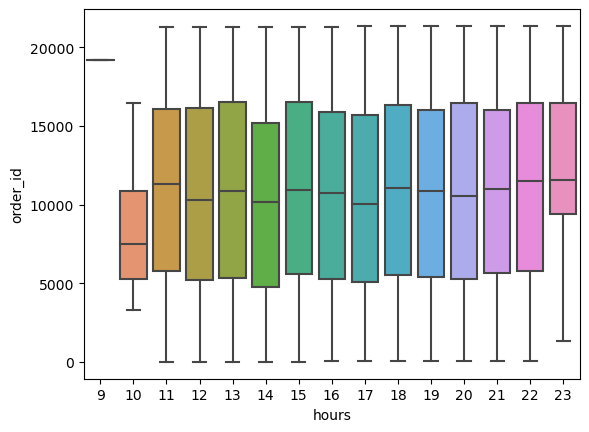

In [190]:
sns.boxplot(data=df,x=df['hours'],y=df['order_id'])

Le boxplot montre à première vue très peu de variance entre les heures excepté pour la plage de 9h.  
Pour confirmer cette hypothèse je réalise une **Anova (Analyse de la variance)** avec la librairie *statsmodels*

In [194]:
# Seuil de signification fixé à 0,05 %
df["hours"] = df["hours"].astype("category")
anova = smf.ols('order_id~hours',data=df).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:               order_id   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.144
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           8.44e-10
Time:                        11:33:43   Log-Likelihood:            -4.9336e+05
No. Observations:               48620   AIC:                         9.868e+05
Df Residuals:                   48605   BIC:                         9.869e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.918e+04   3088.218      6.209      

**Le test de corrélation indique qu'il ne semble pas y avoir de corrélation entre le chiffre d'affaire et l'heure de la journée si ce n'est pas la tranche de 9h. La p-value est supérieure au seuil de 0.05% et le R² est de 0.002 et de ce fait on ne peut pas rejeter l'hypothèse H0 (les variances sont égales).**

## 10.Pizzas populaires :
### a. Quelles sont les 5 pizzas les plus commandées en quantité ?

In [38]:
df.groupby(['pizza_category','pizza_name','pizza_size'])['quantity'].count().sort_values(ascending=False)[:5]


pizza_category  pizza_name                pizza_size
Classic         The Big Meat Pizza        S             1811
Chicken         The Thai Chicken Pizza    L             1365
Veggie          The Five Cheese Pizza     L             1359
                The Four Cheese Pizza     L             1273
Classic         The Classic Deluxe Pizza  M             1159
Name: quantity, dtype: int64

### b. Quelles sont les 5 pizzas les plus commandées en termes de chiffre d'affaires ?

In [39]:
df.groupby(['pizza_category','pizza_name','pizza_size'])['unit_price'].sum().sort_values(ascending=False)[:5]

pizza_category  pizza_name               pizza_size
Chicken         The Thai Chicken Pizza   L             28323.75
Veggie          The Five Cheese Pizza    L             25141.50
                The Four Cheese Pizza    L             22850.35
Supreme         The Spicy Italian Pizza  L             22576.00
Classic         The Big Meat Pizza       S             21732.00
Name: unit_price, dtype: float64

## 11.Chiffre d'affaires par taille et catégorie :
 ### a. Quelle est la répartition du chiffre d'affaires pour chaque taille de pizza ?

In [40]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'year', 'month',
       'day', 'combined_datetime', 'time_difference', 'hours', 'hours_cat'],
      dtype='object')

In [41]:
df.groupby(['pizza_size'])['unit_price'].sum().sort_values(ascending=False)

pizza_size
L      366862.1
M      245409.5
S      174794.5
XL      13872.0
XXL      1006.6
Name: unit_price, dtype: float64

### b. Quelle est la répartition du chiffre d'affaires pour chaque catégorie de pizza ?

In [42]:
df.groupby(['pizza_category'])['unit_price'].sum().sort_values(ascending=False)

pizza_category
Classic    215732.60
Supreme    204486.75
Chicken    191527.25
Veggie     190198.10
Name: unit_price, dtype: float64

## 12.Corrélation entre prix et quantité :
### a. Y a-t-il une corrélation entre le prix unitaire et la quantité commandée ?

Formulation de l'hypothèse :

* H0 = les variances sont égales
* H1 = les variances ne sont pas égales

Définition du niveau de signification : 

*  alpha = 0.05%

J'utilise à nouveau l'ANOVA pour réaliser ce test de corrélation.

In [43]:
df['quantity'].unique()

array([1, 2, 3, 4], dtype=int64)

<Axes: xlabel='quantity', ylabel='unit_price'>

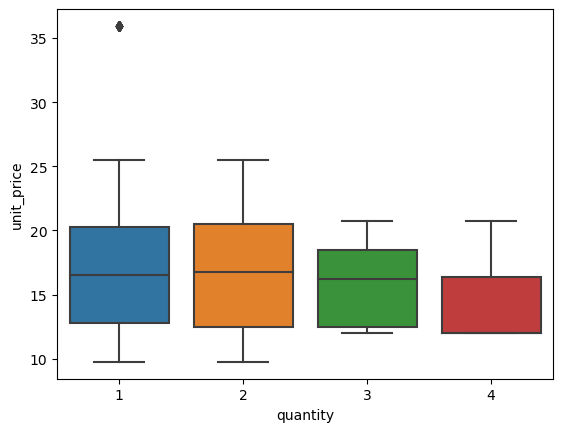

In [44]:
sns.boxplot(data=df,x=df['quantity'],y=df['unit_price'])

In [45]:
# Seuil de signification fixé à 0,05 %
df["quantity_categ"] = df["quantity"].astype("category")
anova = smf.ols('unit_price~quantity_categ', data=df).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:             unit_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.536
Date:                Thu, 25 Jan 2024   Prob (F-statistic):              0.203
Time:                        10:42:51   Log-Likelihood:            -1.3156e+05
No. Observations:               48620   AIC:                         2.631e+05
Df Residuals:                   48616   BIC:                         2.632e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              16.4900    

Avec un R² à 0 et des p-values supérieures au seuil de 0.05%, **on ne peut pas rejeter l'hypothèse H0** et dire qu'il n'y a pas de corrélation entre le prix unitaire et la quantité commandée. 

### b. Quel est le prix unitaire moyen pour différentes tailles de pizza ?

In [46]:
df.groupby('pizza_size')['unit_price'].mean()

pizza_size
L      19.802553
M      15.951219
S      12.364328
XL     25.500000
XXL    35.950000
Name: unit_price, dtype: float64

## 13.Tendances saisonnières :
### a. Y a-t-il des tendances saisonnières dans les commandes de pizza ?

In [47]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'year', 'month',
       'day', 'combined_datetime', 'time_difference', 'hours', 'hours_cat',
       'quantity_categ'],
      dtype='object')

In [48]:
df['quarter'] = df['order_date'].dt.quarter

In [72]:
df['day'].unique()

['Thursday', 'Friday', NaN, 'Tuesday', 'Wednesday']
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

In [49]:
dict = {1 : 'Hiver', 2 : 'Printemps', 3: 'Ete', 4 : 'Automne'}
df = df.replace({"quarter": dict})

In [50]:
df.loc[df['quarter']=='Hiver'][['pizza_name']].value_counts()[:10]

pizza_name                  
The Barbecue Chicken Pizza      622
The Pepperoni Pizza             620
The Hawaiian Pizza              588
The California Chicken Pizza    583
The Thai Chicken Pizza          571
The Classic Deluxe Pizza        562
The Sicilian Pizza              489
The Four Cheese Pizza           470
The Southwest Chicken Pizza     463
The Spicy Italian Pizza         461
Name: count, dtype: int64

In [51]:
df.loc[df['quarter']=='Printemps'][['pizza_name']].value_counts()[:10]

pizza_name                  
The Classic Deluxe Pizza        622
The Barbecue Chicken Pizza      616
The Hawaiian Pizza              592
The California Chicken Pizza    581
The Pepperoni Pizza             564
The Thai Chicken Pizza          564
The Italian Supreme Pizza       506
The Spicy Italian Pizza         492
The Four Cheese Pizza           480
The Southwest Chicken Pizza     465
Name: count, dtype: int64

In [52]:
df.loc[df['quarter']=='Ete'][['pizza_name']].value_counts()[:10]

pizza_name                  
The Classic Deluxe Pizza        628
The Pepperoni Pizza             625
The Thai Chicken Pizza          591
The Barbecue Chicken Pizza      589
The Hawaiian Pizza              582
The California Chicken Pizza    578
The Southwest Chicken Pizza     498
The Spicy Italian Pizza         469
The Big Meat Pizza              458
The Sicilian Pizza              447
Name: count, dtype: int64

In [53]:
df.loc[df['quarter']=='Automne'][['pizza_name']].value_counts()[:10]

pizza_name                  
The Hawaiian Pizza              608
The Classic Deluxe Pizza        604
The Thai Chicken Pizza          589
The California Chicken Pizza    560
The Pepperoni Pizza             560
The Barbecue Chicken Pizza      545
The Sicilian Pizza              494
The Spicy Italian Pizza         465
The Four Cheese Pizza           461
The Southwest Chicken Pizza     459
Name: count, dtype: int64

### b. Y a-t-il une corrélation entre le jour de la semaine et la quantité de commandes ?

Pour savoir s'il y a une corrélation entre une le jour de la semaine et la quantité de commandes

In [54]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'year', 'month',
       'day', 'combined_datetime', 'time_difference', 'hours', 'hours_cat',
       'quantity_categ', 'quarter'],
      dtype='object')

In [68]:
df_day = df.groupby('day')['quantity'].sum().reset_index()
df_day

,day,quantity
0,Monday,0
1,Tuesday,6895
2,Wednesday,6946
3,Thursday,7478
4,Friday,8242
5,Saturday,0
6,Sunday,0


In [63]:
df['day'] = pd.Categorical(df['day'], ordered=True)

In [65]:
df_day['day']= pd.Categorical(df_day['day'], ordered=True)

In [66]:
# Seuil de signification fixé à 0,05 %

anova = smf.ols('quantity~day', data=df_day).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:               quantity   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 25 Jan 2024   Prob (F-statistic):                nan
Time:                        10:48:07   Log-Likelihood:                 175.10
No. Observations:                   7   AIC:                            -336.2
Df Residuals:                       0   BIC:                            -336.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         8106.0000        inf  

C:\Users\sarah\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\sarah\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\sarah\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\sarah\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


D'après les résultats, avec un **R² à 0** et **des p-values supérieures au seuil de 0.05%** nous ne pouvons pas rejeter l'hypothèse H0 (les variances sont égales).

In [67]:
df_day

,day,quantity
0,Friday,8106
1,Monday,6369
2,Saturday,7355
3,Sunday,5917
4,Thursday,7323
5,Tuesday,6753
6,Wednesday,6797
